In [43]:
import numpy as np
import pandas as pd
import matplotlib as plt
import json
import re

In [44]:
claim_denied = pd.read_csv('claim_denied',header = None, sep='-')
claim_denied.columns = ['case','platform','tag','other']
claim_denied['timeStamp'] = claim_denied.other.map(lambda x: float(x.split(',')[-1]))
claim_denied['customer_id'] = claim_denied.tag.map(lambda x: x.split(':')[-1].strip())
claim_denied.tag =  "Claim_Deined"
del claim_denied['other']
claim_denied.head()

,case,platform,tag,timeStamp,customer_id
0,e6cd8ce31a1d4d6,mobile_browser,Claim_Deined,1.483203e+09,99ccf1
1,e67b69c9b4554c0,pc_browser,Claim_Deined,1.483204e+09,b7aab4
2,58891c5466d240b,pc_browser,Claim_Deined,1.483211e+09,2bc68b
3,94270be3a7f440a,mobile_browser,Claim_Deined,1.483218e+09,48802d
4,a699b8150503414,pc_browser,Claim_Deined,1.483223e+09,3b8ce8


In [45]:
payment_completed = pd.read_csv("payment_completed_basic",
                             header = None,
                             names = ['case' ,'platform', 'customer_id', 'timeStamp'])
payment_completed['tag'] = "Payment_Completed"

In [46]:
claim_accepted = pd.read_csv("claim_accepted_basic",
                             header = None,
                             names = ['case', 'paid_amount' ,'platform', 'customer_id', 'timeStamp'])
claim_accepted['tag'] = "Claim_Accepted"
claim_accepted.head()

,case,paid_amount,platform,customer_id,timeStamp,tag
0,ea0f160a58c3496,19720.15,pc_browser,9bae09,1.483211e+09,Claim_Accepted
1,3be3afe8a7b04c5,13928.65,pc_browser,3d476d,1.483228e+09,Claim_Accepted
2,68ad8febf880477,15241.79,mobile_browser,dbbf0f,1.483304e+09,Claim_Accepted
3,e646f20fe849498,13331.07,mobile_app,c1b810,1.483381e+09,Claim_Accepted
4,6860630a3310419,14458.90,mobile_app,af1eee,1.483406e+09,Claim_Accepted


In [47]:
quote_completed = pd.read_csv('quote_completed_combined',
                  sep = '~',
                  header = None,
                  names = ['case','payload'])
quote_completed.head()

,case,payload
0,1368d40a4f6e455,"{""name"": ""Nicole Berry"", ""email"": ""Nicole Berr..."
1,6859e40fdc3f40d,"{""name"": ""Brandi Harris"", ""email"": ""Brandi Har..."
2,be4398c940284fe,"{""name"": ""Christopher Moody"", ""email"": ""Christ..."
3,0baaef67fe8a458,"{""name"": ""Loretta Steele"", ""email"": ""Loretta S..."
4,8fd309fecc6d43a,"{""name"": ""Shawn Cruz"", ""email"": ""Shawn Cruz@hi..."


In [48]:
quote_completed['name'] = quote_completed.payload.map(lambda x: json.loads(x)['name'])
quote_completed['email'] = quote_completed.payload.map(lambda x: json.loads(x)['email'])
quote_completed['gender'] = quote_completed.payload.map(lambda x: json.loads(x)['gender'])
quote_completed['age'] = quote_completed.payload.map(lambda x: json.loads(x)['age'])
quote_completed['home'] = quote_completed.payload.map(lambda x: json.loads(x)['home'])

In [49]:
quote_completed['home_type'] = quote_completed.home.map(lambda x: x['type'])
quote_completed['square_footage'] = quote_completed.home.map(lambda x: x['square_footage'])
quote_completed['number_of_bedrooms'] = quote_completed.home.map(lambda x: x['number_of_bedrooms'])
quote_completed['number_of_floors'] = quote_completed.home.map(lambda x: x['number_of_floors'])
quote_completed['household'] = quote_completed.payload.map(lambda x: json.loads(x)['household'])
del quote_completed['payload']
del quote_completed['home']

In [50]:
# why cannot I use - to split the columnns ?
tmp = pd.read_csv('quote_completed_basic',
                  header = None,
                  names = ['case','platform','customer_id','street','suburb','timeStamp'])
tmp['tag'] = "Quote_Completed"
tmp.street = tmp.street.map(lambda x:x.strip()) 
tmp.suburb = tmp.suburb.map(lambda x:x.strip()) 
tmp.shape

(523322, 7)

In [51]:
len(tmp.suburb.unique().tolist())
# there are only 490 unique suburbs in the data

490

In [52]:
quote_completed = pd.merge(quote_completed, tmp, on='case')

In [53]:
quote_completed.head()

,case,name,email,gender,age,home_type,square_footage,number_of_bedrooms,number_of_floors,household,platform,customer_id,street,suburb,timeStamp,tag
0,1368d40a4f6e455,Nicole Berry,Nicole Berry@hotmail.com,male,29,1,311.803620,2,1,"[{'name': 'Oscar Berry', 'age': 25, 'gender': ...",mobile_browser,99ccf1,66 Lake Jamieview,PSC,1.483194e+09,Quote_Completed
1,6859e40fdc3f40d,Brandi Harris,Brandi Harris@duncan.com,male,62,1,523.432957,2,1,"[{'name': 'Michael Harris', 'age': 12, 'gender...",pc_browser,9bae09,60 West Lisaside,Jamie Port Suite,1.483197e+09,Quote_Completed
2,be4398c940284fe,Christopher Moody,Christopher Moody@green.info,male,40,1,221.633267,3,1,[],pc_browser,b7aab4,120 Danielmouth,Unit Box,1.483201e+09,Quote_Completed
3,0baaef67fe8a458,Loretta Steele,Loretta Steele@patton-smith.biz,female,48,1,301.854950,3,1,"[{'name': 'Zachary Steele', 'age': 48, 'gender...",pc_browser,2bc68b,73 Edwardfurt,Michelle Crossing Suite,1.483205e+09,Quote_Completed
4,8fd309fecc6d43a,Shawn Cruz,Shawn Cruz@hines-hicks.com,female,33,0,265.802910,1,1,"[{'name': 'Rebecca Cruz', 'age': 13, 'gender':...",phone_call,1c425a,3 Patriciastad,Nguyen Tunnel,1.483208e+09,Quote_Completed


In [54]:
print(quote_completed.shape )
# quote_completed.groupby('customer_id').count().sort_values(by = ['case'],ascending = False)

(523322, 16)


In [55]:
# Just take a look at the claim_started data set 
claim_started = pd.read_csv('claim_started_basic',
                  header = None,
                  names = ['case','platform','customer_id','timeStamp'])
claim_started['tag'] = "Claim_Started"
claim_started.shape

(826795, 5)

In [56]:
claim_started.head()

,case,platform,customer_id,timeStamp,tag
0,90527688b31d445,mobile_browser,99ccf1,1.483194e+09,Claim_Started
1,4c9ab2942b484f2,pc_browser,9bae09,1.483197e+09,Claim_Started
2,cf1d5d9af6d54ef,pc_browser,b7aab4,1.483201e+09,Claim_Started
3,84618ef8bc28479,mobile_browser,983092,1.483204e+09,Claim_Started
4,ae3f3d4c667a455,pc_browser,2bc68b,1.483205e+09,Claim_Started


In [57]:
# find out if there is a payment_completed case at the same timeStamp, for the same customer 
# lable all the claim_started cases this way 
claim_started.iloc[0]

case           90527688b31d445
platform        mobile_browser
customer_id             99ccf1
timeStamp          1.48319e+09
tag              Claim_Started
Name: 0, dtype: object

In [58]:
c0 = claim_started.iloc[0]['customer_id']
t0 = claim_started.iloc[0]['timeStamp']
# based on this timeStamp, we look at the following tables: 
# quote completed, claim denied, claim accepted 
# only look at the data prior to this timeStamp, and 

In [59]:
# quote_completed[ (quote_completed.timeStamp <t0) & (quote_completed.customer_id == c0)] 
# claim_accepted[ (claim_accepted.timeStamp <t0) & (claim_accepted.customer_id == c0)] 
# claim_denied[ (claim_denied.timeStamp <t0) & (claim_denied.customer_id == c0)] 

### this data shows how many times each customer started their claims 

### Let's take a look at how many times they get denied and accepted each. 

In [60]:
tmp = claim_started.groupby('customer_id').count().sort_values(by = ['case'],ascending = False)
list_ = tmp.columns.tolist()
tmp['Total'] = tmp.case
for item in list_:
    del tmp[item]

In [61]:
# claim_denied dataframe has problem that the customer_id has white spaces 
tmp_denied = claim_denied.groupby('customer_id').count().sort_values(by = ['case'],ascending = False)
list_ = tmp_denied.columns.tolist()
tmp_denied['Denied'] = tmp_denied.case
for item in list_:
    del tmp_denied[item]

In [62]:
tmp_accepted = claim_accepted.groupby('customer_id').count().sort_values(by = ['case'],ascending = False)
list_ = tmp_accepted.columns.tolist()
tmp_accepted['Accepted'] = tmp_accepted.case
for item in list_:
    del tmp_accepted[item]

In [63]:
tmp.reset_index(level=0, inplace=True)
tmp_denied.reset_index(level=0, inplace=True)
tmp_accepted.reset_index(level=0, inplace=True)

In [64]:
mg_df = pd.merge(tmp, tmp_accepted, how = 'left', on= 'customer_id')
mg_df = pd.merge(mg_df, tmp_denied, how = 'left', on= 'customer_id')

In [65]:
all_accepted = mg_df[(mg_df.Accepted == mg_df.Total)]
all_denied = mg_df[(mg_df.Denied == mg_df.Total)]
mixed = mg_df[(mg_df.Accepted >0) & (mg_df.Denied>0)]

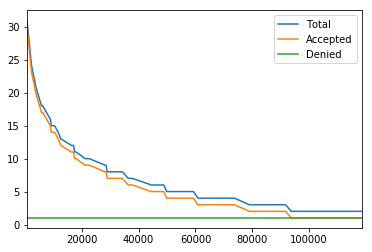

In [66]:
%matplotlib inline
mixed.plot()

In [67]:
101/claim_started.shape[0]
# 以上奇怪的数据仅占总数的万分之一

0.00012215845523981156

In [68]:
# mg_df[mg_df.Accepted > 0].shape
mg_df[mg_df.Denied == 1].shape

(10488, 4)

In [69]:
denied_started = pd.merge(tmp, tmp_denied, on= 'customer_id')
denied_started[denied_started.Denied > 1 ]

,customer_id,Total,Denied
81,46d885,2,2
93,f7dbe5,2,2
100,9b5212,2,2


In [70]:
count_payload = quote_completed.groupby('customer_id').count().sort_values(by = ['case'],ascending = False)
list_ = count_payload.columns.tolist()
count_payload['num_of_payload'] = count_payload.case
for item in list_:
    del count_payload[item]
more_than_one_payload  = set(count_payload[count_payload.num_of_payload > 1].index.tolist())

In [71]:
# all the mixed customers have more than one payload 
mixed_payload  = set(mg_df.customer_id.tolist())
mixed_payload - more_than_one_payload

{'ce9da7',
 '6a1597',
 'b5dcb5',
 '9b668c',
 '3725a8',
 '71105d',
 'd4bb1f',
 '50930a',
 '3f7d6b',
 '4c69ca',
 '9eb773',
 '4cb57c',
 'e6e775',
 '73651a',
 '8d2361',
 'd154c9',
 'fd5616',
 '49b17d',
 '1c8b09',
 '1d6fd3',
 '4989a3',
 '46ab42',
 'a60583',
 'a57849',
 '618e92',
 '249cba',
 '6774ca',
 'e1c646',
 '9c7ad2',
 'a1ba9e',
 '7288ab',
 '08688f',
 'a0a325',
 '8dc3e2',
 '702a71',
 'a3e623',
 '59061f',
 'ca5e57',
 '60f03c',
 '8fc3f8',
 'e0b847',
 '04db9b',
 '2db902',
 'edf147',
 'eed611',
 '77586c',
 '61df26',
 'ff56c0',
 '301180',
 '4fa976',
 '56aec4',
 '9154dc',
 '35ef16',
 '3da700',
 '4ef61a',
 '6848f4',
 '02f31b',
 '8287a5',
 'dea4a2',
 'a71ebb',
 'ce66c6',
 'e13eef',
 '9a489a',
 '6d89f8',
 '1c36b5',
 '76692b',
 'd1626b',
 'b2d34d',
 '7cd222',
 'd7c2f0',
 '3dd8b0',
 '3382aa',
 '611eec',
 '84e080',
 'bed735',
 '3e3024',
 '6a5b2f',
 '24ff45',
 'ecc014',
 '9eedd9',
 'baa9ba',
 '7aba63',
 'afab3b',
 '60ffb5',
 '807386',
 'bafb53',
 'e2f04e',
 '48917a',
 '270c56',
 '774065',
 'b4a92b',

In [72]:
claim_started.head()

,case,platform,customer_id,timeStamp,tag
0,90527688b31d445,mobile_browser,99ccf1,1.483194e+09,Claim_Started
1,4c9ab2942b484f2,pc_browser,9bae09,1.483197e+09,Claim_Started
2,cf1d5d9af6d54ef,pc_browser,b7aab4,1.483201e+09,Claim_Started
3,84618ef8bc28479,mobile_browser,983092,1.483204e+09,Claim_Started
4,ae3f3d4c667a455,pc_browser,2bc68b,1.483205e+09,Claim_Started


In [73]:
# claim_accepted.to_csv("important_data/claim_accepted_cleaned.csv",index= False)
# claim_started.to_csv("important_data/claim_started_cleaned.csv",index= False)
# claim_denied.to_csv("important_data/claim_denied_cleaned.csv",index= False)
# mg_df.to_csv( "important_data/mixed.csv", index = False)

In [74]:
incoming_case = pd.merge(claim_started,payment_completed, how = "left", on  = ['timeStamp','customer_id'])
incoming_case.case_y = incoming_case.case_y.notnull().astype('int')
del incoming_case['platform_y']
del incoming_case['tag_y']
del incoming_case['tag_x']
# matched_payment_compelte indicate whether the claim_started is matched with a payment completed case
incoming_case.columns = ['case','platform','customer_id','timeStamp','matched_payment_complete']


incoming_case = pd.merge(incoming_case , all_accepted, how = 'left', on =['customer_id'])
incoming_case.Total = incoming_case.Total.notnull().astype('int')
incoming_case.rename(columns={'Total':'all_accepted'}, inplace=True)
del incoming_case['Accepted']
del incoming_case['Denied']
incoming_case.all_accepted = incoming_case.all_accepted.map({1:-1,0:0})

incoming_case = pd.merge(incoming_case , all_denied, how = 'left', on =['customer_id'])
incoming_case.Total = incoming_case.Total.notnull().astype('int')
incoming_case.rename(columns={'Total':'all_denied'}, inplace=True)
del incoming_case['Accepted']
del incoming_case['Denied']
# incoming_case.all_denied = incoming_case.all_denied.map({1:-1,0:0})

incoming_case['label'] = incoming_case.all_accepted + incoming_case.all_denied
del incoming_case['all_denied']
del incoming_case['all_accepted']
incoming_case.head()

,case,platform,customer_id,timeStamp,matched_payment_complete,label
0,90527688b31d445,mobile_browser,99ccf1,1.483194e+09,1,1
1,4c9ab2942b484f2,pc_browser,9bae09,1.483197e+09,1,-1
2,cf1d5d9af6d54ef,pc_browser,b7aab4,1.483201e+09,1,1
3,84618ef8bc28479,mobile_browser,983092,1.483204e+09,0,-1
4,ae3f3d4c667a455,pc_browser,2bc68b,1.483205e+09,1,1


In [75]:
# the label of 1 indicate fraud, -1 indicate not fraud, 0 indicate no entry for now 
# incoming_case[(incoming_case.label == 0)  ].groupby('customer_id').count()
mixed[mixed.Denied ==  1].shape # there are all denied once 

(101, 4)

In [76]:
# for the mixed customers, we find out which cases are denied, find the case_id 
# label all these positives, then label all 0 to be negatives 
mixed_claims = pd.merge(claim_denied , mixed , on = ['customer_id'])
test = pd.merge(mixed_claims, claim_started, how = "outer", on = ['customer_id'])

## something wrong right here
# test[test.timeStamp_x > test.timeStamp_y].groupby("customer_id")[['timeStamp_y']].max()
id_time = test[test.timeStamp_x > test.timeStamp_y].groupby("customer_id")[['timeStamp_y']].max()

test_ = pd.merge(id_time, test, how = "left", on = ['timeStamp_y'])[['case_y','timeStamp_y','customer_id']]
# merge with claim started, on customer_id, and left.time > right.time


In [77]:
mixed_denied = test_[ ['case_y', 'timeStamp_y'] ]

In [78]:
mixed_denied.columns = ['case','timeStarted']

In [79]:
# incoming_case.head()
mixed_denied.head()

,case,timeStarted
0,610936390c6c482,1.520961e+09
1,4bad7df3dfa04e9,1.483467e+09
2,0560cabfca294b5,1.525104e+09
3,c4e4cd69b30a424,1.531419e+09
4,bbcbaa607bae423,1.488485e+09


In [80]:
incoming_case = pd.merge(incoming_case , mixed_denied , how = 'left', on = 'case')
incoming_case.timeStarted = incoming_case.timeStarted.notnull().astype('int')
incoming_case.label = incoming_case.label + incoming_case.timeStarted
incoming_case.label = incoming_case.label.map({1:1,-1:-1,0:-1})

In [81]:
# test_2[(test_2.label == 1) & (test_2.matched_payment_complete == 1) ].shape
# test_2[(test_2.label == 1) ].shape
# test_2[(test_2.matched_payment_complete == 1) ].shape
del incoming_case['timeStarted']

In [82]:
all_accepted.head()

,customer_id,Total,Accepted,Denied
0,a49ce0,61,61.0,NaN
1,356495,55,55.0,NaN
2,5d99f5,54,54.0,NaN
3,885032,53,53.0,NaN
4,9bb969,53,53.0,NaN


In [89]:
# incoming_case
# quote_completed #y
# about 80 percent of the matched_payment cases, are frauds 
# wonder what about the rest of them 
joined = pd.merge(incoming_case, quote_completed, how = "left", on = ['customer_id'])

In [91]:
joined = joined[joined.timeStamp_x > joined.timeStamp_y]

In [99]:
max_time_y = joined.groupby("customer_id")[["timeStamp_y"]].max()
final = pd.merge(joined,max_time_y,how="left",on=['customer_id','timeStamp_y'])

In [100]:
final.shape

(839638, 21)

In [97]:
incoming_case.shape

(826795, 6)